In [151]:
#Nome: Valdir Evaristo da Silva Junior
#Curso: Bando de dados 6º semestre 12/2020

In [ ]:
#Analise de valores dos bens de candidatos a prefeito de São José dos Campos nas eleiçoes de 2016 e 2020
# Dados retirados de : https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [195]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [196]:
#Incluindo  arquivos .csv referente a consulta de nome tipo de candidatura e cidade  dos candidatos e bens dos candidatos:

In [197]:
df = pd.read_csv('bem_candidato_2020_SP.csv',encoding='latin-1',sep=';')

In [198]:
df2 = pd.read_csv('consulta_cand_2020_SP.csv',encoding='latin-1',sep=';')

In [199]:
df3 = pd.read_csv('bem_candidato_2016_SP.csv',encoding='latin-1',sep=';')

In [200]:
df4 = pd.read_csv('consulta_cand_2016_SP.csv',encoding='latin-1',sep=';')

In [201]:
#Analisando os códigos referente a cargos de candidatos de 2020, valor 11 é referente a prefeito e ao lado vemos a quantidade
#candidatos no estado de São Paulo em 2020

In [202]:
df2['CD_CARGO'].value_counts()

13    87334
12     2655
11     2646
Name: CD_CARGO, dtype: int64

In [203]:
#Analisando os códigos referente a cargos de candidatos de 2020, valor 11 é referente a prefeito e ao lado vemos a quantidade
#candidatos no estado de São Paulo em 2016

In [204]:
df4['CD_CARGO'].value_counts()

13    82074
12     2376
11     2329
Name: CD_CARGO, dtype: int64

In [205]:
#Nas próximas duas linhas criamos as variaveis "prefeito" e "prefeito2016" :

In [206]:
prefeito= df2[(df2['CD_CARGO']==11)]

In [207]:
prefeito2016= df4[(df4['CD_CARGO']==11)]

In [208]:
#Nas próximas duas linhas retiramos candidatos com códigos duplicados:

In [209]:
prefeito['SQ_CANDIDATO'].drop_duplicates()

11       250000634989
43       250000671209
55       250000873386
66       250000960813
82       250000665006
             ...     
92516    250001182046
92558    250000694969
92568    250000653011
92586    250000874422
92634    250000908726
Name: SQ_CANDIDATO, Length: 2646, dtype: int64

In [210]:
prefeito2016['SQ_CANDIDATO'].drop_duplicates()

12       250000012203
17       250000013366
173      250000060456
254      250000083659
359      250000019644
             ...     
86608    250000056277
86624    250000064796
86681    250000022786
86689    250000086265
86707    250000050616
Name: SQ_CANDIDATO, Length: 2303, dtype: int64

In [211]:
#No próximo gráfico pode-se vericar qual cidade teve mais candidados a prefeito no estado de São Paulo em 2020:

<AxesSubplot:ylabel='NM_UE'>

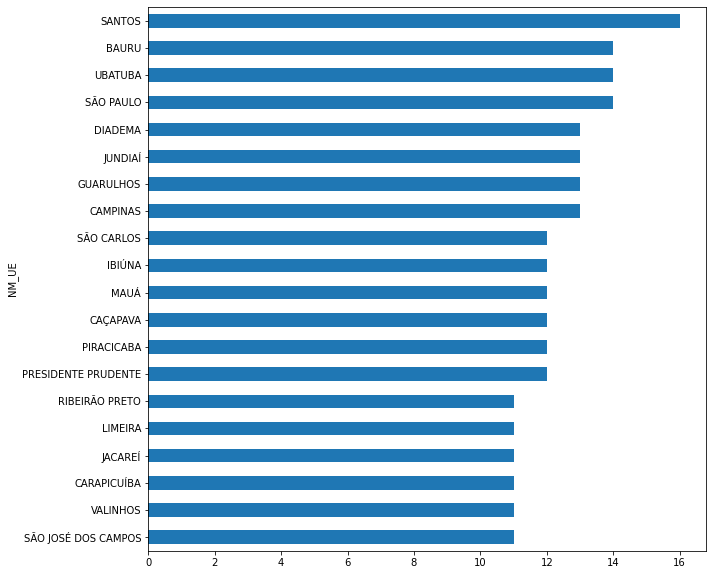

In [212]:
prefeito.groupby('NM_UE').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [159]:
#No próximo gráfico pode-se vericar qual cidade teve mais candidados a prefeito no estado de São Paulo em 2016:

<AxesSubplot:ylabel='NM_UE'>

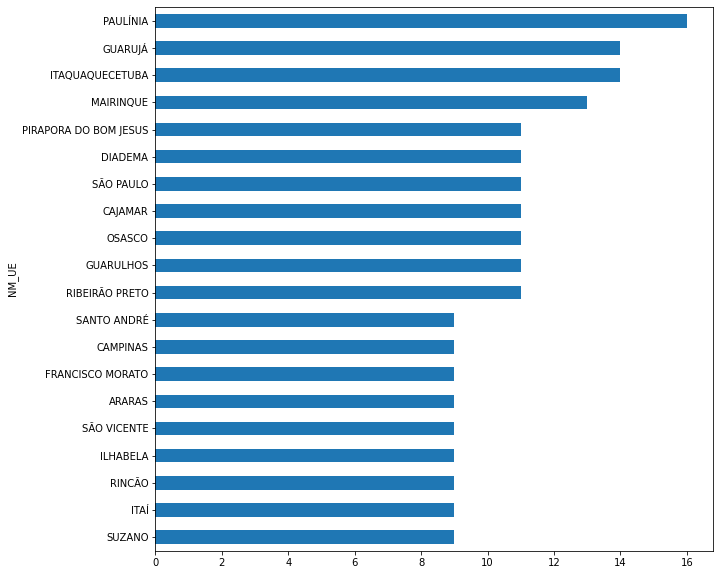

In [213]:
prefeito2016.groupby('NM_UE').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [214]:
#Nas próximas duas linhas iremos realizar a junção dos arquivos referente a dados e valores dos candidados :

In [215]:
bens2020 = pd.merge(df,
                    prefeito[['SQ_CANDIDATO','NM_CANDIDATO']],
                    on='SQ_CANDIDATO')

In [216]:
bens2016 = pd.merge(df3,
                    prefeito2016[['SQ_CANDIDATO','NM_CANDIDATO']],
                    on='SQ_CANDIDATO')

In [ ]:
#Nas próximas duas linhas veirificaremos os nomes das colunas para realizar as consultas referente a valores:

In [217]:
bens2020.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO',
       'NM_CANDIDATO'],
      dtype='object')

In [168]:
bens2016.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO',
       'NM_CANDIDATO'],
      dtype='object')

In [ ]:
#Agora uma pequena verificação dos dados que  estão na tabela até o momento :

In [218]:
bens2020.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO,NM_CANDIDATO
12567,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,64653,GUARARAPES,250001135737,3,21,"Veículo automotor terrestre: caminhão, automóv...","UM VEICULO HONDA HRV TOURING CVT, ANO 2017","95699,70",04/10/2020,12:38:57,TAREK DARGHAM
13858,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,71838,TAUBATÉ,250001180048,1,2,Prédio comercial,50% de imóvel comercial situado a rua Jorge Wi...,"40000,00",28/09/2020,17:47:41,FRANCISCO CARLOS DE AZEVEDO OIRING
5248,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,62910,CAMPINAS,250000842625,9,19,Outros bens imóveis,GLEBA RURAL I-C RESERVA DA FLORESTA DISTR DE S...,"265877,96",04/10/2020,18:47:43,HÉLIO DE OLIVEIRA SANTOS
9120,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,66338,LAVRINHAS,250001017617,2,21,"Veículo automotor terrestre: caminhão, automóv...",MMC/L200 OUTDOOR 2011/2012,"48500,00",04/10/2020,14:27:28,JOSE BENEDITO DA SILVA
12754,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,64254,FRANCA,250001152097,1,12,Casa,"Sito a Rua Adolfo Lutz, 459, Ribeirão Preto ¿ ...","87428,59",30/09/2020,18:51:57,ORIVALDO DONZELLI
3557,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,61891,AVARÉ,250000780079,26,99,OUTROS BENS E DIREITOS,BRADESCO CONTA 20730-6 E 120116-6,"0,01",03/10/2020,12:49:35,DENILSON ROCHA ZIROLDO
10301,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,63290,CERQUEIRA CÉSAR,250001074698,5,13,Terreno,TERRA,"22993,56",04/10/2020,17:34:35,VICENTE PAVAN
3543,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,61891,AVARÉ,250000780079,12,12,Casa,"CONSTRUÇÃO (PAREDES, LAGES E TELHADO) RUA MINA...","10000,00",03/10/2020,12:49:35,DENILSON ROCHA ZIROLDO
15272,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,64955,IBIÚNA,250001241688,13,12,Casa,"UMA CASA SITO A RUA ANTONIO ANNUNCIATO N 379, ...","244000,00",04/10/2020,17:30:56,JOAO BENEDICTO DE MELLO NETO
11087,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,67512,NEVES PAULISTA,250001099602,12,39,Outras participações societárias,QUOTAS DE CAPITAL SOCIAL DA EMPRESA RES PARQUE...,"327660,00",03/10/2020,18:12:52,EDUARDO ALVAREZ ROMERO NETO


In [169]:
bens2016.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO,NM_CANDIDATO
1722,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,61220,ALUMÍNIO,250000092760,48,21,"Veículo automotor terrestre: caminhão, automóv...","AUTOMOVEL FIAT ALFA ROMEO, ANO 1993/1994.","16000,00",12/07/2018,16:36:19,ANTONIO PIASSENTINI
3531,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,62952,CAMPOS DO JORDÃO,250000007825,1,14,Terra nua,1/7 DE UMA GLEBA DE TERRAS EM CAMPOS DO JORDÃO...,"12532,00",12/07/2018,16:36:23,SEBASTIÃO TADEU GONÇALVES DA SILVA
1868,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,68217,PARAPUÃ,250000070653,1,32,Quotas ou quinhões de capital,90% DO CAPITAL SOCIAL DA EMPRESA RVL INTERMEDI...,"9000,00",12/07/2018,16:36:20,RUI LOBO
12007,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,68217,PARAPUÃ,250000051309,10,21,"Veículo automotor terrestre: caminhão, automóv...","CRUZE LT HB FLEX MOTOR,ANO 2013/2013,COR BRANC...","67000,00",12/07/2018,16:36:22,GILMAR MARTIN MARTINS
92,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,68918,PITANGUEIRAS,250000029523,5,59,Outros créditos e poupança vinculados,CONTA SICOOB,"13774,99",12/07/2018,16:36:25,MÁRIO LUIZ DE SOUZA
15030,23/01/2020,08:44:20,2016,1,Eleição Suplementar,279,Suplementar de Sebastianópolis do Sul,19/11/2017,SP,71277,SEBASTIANÓPOLIS DO SUL,250000094747,4,21,"Veículo automotor terrestre: caminhão, automóv...",FIAT UNO FIRE 2001/2002 PLACA DFU1505,"8000,00",14/09/2018,10:40:33,OTAMIR AMERICO MARQUES
3860,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,71773,TAQUARITUBA,250000087599,10,61,Depósito bancário em conta corrente no País,SALDO EM CONTA CORRENTE - BANCO BRADESCO S/A.,"14,61",12/07/2018,16:36:27,JOSE CLOVIS DE ALMEIDA
6541,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,71773,TAQUARITUBA,250000068117,50,2,Prédio comercial,"33% PREDIO COMERCIAL C/ 6,33 M2 CIDADE ITAPEVA","66666,67",12/07/2018,16:36:22,WALDEMAR SOLDERA
121,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,63479,CONCHAS,250000037944,8,13,Terreno,"TERRENO, PEREIRAS/SP","31000,00",12/07/2018,16:36:25,ODIRLEI REIS
10452,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,70610,SANTO ANTÔNIO DE POSSE,250000014234,3,21,"Veículo automotor terrestre: caminhão, automóv...",MOTO TITAN ANO 2008,"12960,00",12/07/2018,16:36:23,MAURÍCIO DIMAS COMISSO


In [ ]:
#Nas próximas duas consultas limparemos as tabelas para ficar apenas as colunas referente ao nome da cidade
# o sequencial do candidado, valor do bem e nome do candidato:

In [170]:
bens2020 = bens2020[['NM_UE','SQ_CANDIDATO','VR_BEM_CANDIDATO','NM_CANDIDATO']]

In [171]:
bens2016 = bens2016[['NM_UE','SQ_CANDIDATO','VR_BEM_CANDIDATO','NM_CANDIDATO']]

In [172]:
#Nas proximas duas consultas verificaremos como ficou nossas tabelas :

In [219]:
bens2020.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO,NM_CANDIDATO
6887,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,67156,MOGI GUAÇU,250000922029,1,11,Apartamento,APARTAMENTO LOCALIZADO A RUA FRANCISCO MONTEDI...,"91461,00",24/09/2020,09:07:37,RODRIGO FALSETTI
11791,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,72257,VALINHOS,250001114399,5,12,Casa,"RUA FIORAVANTE AGNELO, 1431 - VALINHOS/SP","1600000,00",27/09/2020,10:40:05,JOSÉ APARECIDO AGUIAR
14833,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,71218,SÃO VICENTE,250001216496,4,12,Casa,"Rua Marcilio Dias do Nascimento, 72 - Catiapoã...","172459,73",03/10/2020,12:50:38,LUIZ CARLOS GIANELLI TEIXEIRA
8331,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,65374,ITAÍ,250000991044,7,21,"Veículo automotor terrestre: caminhão, automóv...",ONIBUS CAIO GIRO 2007,"75000,00",29/09/2020,16:12:13,SILVIO HENRIQUE VIDEIRA
9604,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,63630,CRAVINHOS,250001031968,4,32,Quotas ou quinhões de capital,Cinquenta por cento do Capital Social da Empre...,"500,00",02/10/2020,17:07:31,SILVIO LUÍS FAITANO FERNANDES
10873,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,72397,VIRADOURO,250001095037,2,21,"Veículo automotor terrestre: caminhão, automóv...",CAMINHÃO MARCA SCANIA MODELO R113 E 6X4 ANO F...,"90000,00",03/10/2020,09:46:54,MARCOS ROBERTO DE SOUZA
12690,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,63231,CATANDUVA,250001143994,11,14,Terra nua,50% DO SITIO ALTO DA BOA VISTA,"170000,00",25/09/2020,22:44:39,RICARDO ALEXANDRE REBELATO
3287,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,61263,ARAÇARIGUAMA,250000771303,13,11,Apartamento,"Apartamento - Rua Bolivia, 88 - Jd. Guilhermina","65000,00",01/10/2020,18:20:36,CLAUDIO ANTONIO MARTINS
3109,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,66591,LUTÉCIA,250000768026,7,13,Terreno,Dois terrenos de 10x40m² cada na Rua Francisco...,"80000,00",04/10/2020,18:34:41,LAUDEMIR LEATI
14798,05/10/2020,12:29:29,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,SP,62359,BOCAINA,250001215230,2,32,Quotas ou quinhões de capital,100% QUOTAS CAPITAL DA EMPRESA BENEDITO SEBAST...,"6180,30",27/09/2020,09:14:38,BENEDITO SEBASTIÃO ALEXANDRE


In [220]:
bens2016.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO,NM_CANDIDATO
4890,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,68314,PAULÍNIA,250000038496,91,29,Outros bens móveis,01 MISTURADOR RAÇÃO SILTOMAC,"20000,00",09/11/2018,15:23:41,JOSE PAVAN JUNIOR
6561,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,71773,TAQUARITUBA,250000068117,14,19,Outros bens imóveis,1/3 IMOVEL RURAL C/ 15.73 HAS TAQUARITUBA SP,"6015,10",12/07/2018,16:36:22,WALDEMAR SOLDERA
5771,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,72451,VOTUPORANGA,250000052340,10,73,Fundo de capitalização,FUNDO B.BRASIL BB CP ESTILO AG.4884-4 EM 11/08...,"306826,31",12/07/2018,16:36:22,JOÃO EDUARDO DADO LEITE DE CARVALHO
10008,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,70211,SANTA BRANCA,250000026922,3,21,"Veículo automotor terrestre: caminhão, automóv...",ETIOS TOYOTA ANO 2016/2017,"40000,00",12/07/2018,16:36:24,AILTON MOREIRA LUCENA
9847,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,61310,AMERICANA,250000015455,27,97,VGBL - Vida Gerador de Benefício Livre,APLICAÇÃO EM VGBL,"1599950,00",12/07/2018,16:36:23,OMAR NAJAR
4274,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,65390,ITAJOBI,250000030278,2,12,Casa,UM IMOVEL RESIDENCIAL NA CIDADE DE ITAJOBI-SP,"30500,00",12/07/2018,16:36:25,LAIRTO LUIZ PIOVESANA FILHO
7125,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,65650,ITARARÉ,250000021073,58,41,Caderneta de poupança,POUPANÇA BRADESCO,"13,82",12/07/2018,16:36:24,HELITON SCHEIDT DO VALLE
4763,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,61832,AURIFLAMA,250000083934,7,21,"Veículo automotor terrestre: caminhão, automóv...","VEICULO VW SPACEFOX GII, ANO 2010/2011, COR PR...","48965,00",12/07/2018,16:36:19,PAULO EDUARDO TOMAZ DA SILVA
2587,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,61379,AMPARO,250000032598,12,73,Fundo de capitalização,ITAU S/A,"120,22",12/07/2018,16:36:25,LUIZ OSCAR VITALE JACOB
11382,23/01/2020,08:44:20,2016,2,Eleição Ordinária,220,Eleições Municipais 2016,02/10/2016,SP,70190,ÁGUAS DE SANTA BÁRBARA,250000073378,2,2,Prédio comercial,"UM IMOVEL RESIDENCIAL, COM PREDIO COMERCIAL, E...","450000,00",12/07/2018,16:36:22,JOSE MARIANO DA SILVA


In [177]:
#Agora precisamos trocar as virgulas por ponto na coluna "valor dos bens dos candidatos" para depois 
#realizar a soma dos valores 

In [221]:
bens2020['VR_BEM_CANDIDATO']= bens2020['VR_BEM_CANDIDATO'].str.replace(',', '.').astype('float64')

In [222]:
bens2016['VR_BEM_CANDIDATO']= bens2016['VR_BEM_CANDIDATO'].str.replace(',', '.').astype('float64')

In [ ]:
#Nas próximas duas consultas trocaremos valores nulos por 0:

In [223]:
bens2020['VR_BEM_CANDIDATO'] = bens2020['VR_BEM_CANDIDATO']. fillna (0)

In [224]:
bens2016['VR_BEM_CANDIDATO'] = bens2020['VR_BEM_CANDIDATO']. fillna (0)

In [ ]:
#Agora verificaremos os valores dos bens dos cadidatos em 2020 de São José dos Campos:

In [225]:
bens2020.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum()

NM_UE                SQ_CANDIDATO  NM_CANDIDATO                         
SÃO JOSÉ DOS CAMPOS  250000636793  AGLIBERTO DO SOCORRO CHAGAS                250000.00
                     250000638724  RENATA LEMES DE PAIVA MENDES DA COSTA     1920000.00
                     250000676141  MARINA DE ARANTES LEITE SASSI               31488.00
                     250000693253  FELICIO RAMUTH                            1266822.89
                     250000704006  WAGNER OCIMAR BALIEIRO                     381724.42
                     250000872476  LUIZ CARLOS DE OLIVEIRA                    200000.00
                     250000874393  ANDERSON ALVES SENE                        538466.93
                     250001064096  CONSTANTINO CURY NETO                    12945436.00
                     250001158050  ELIANE NIKOLUK SCACHETTI                  1104359.23
                     250001178153  JOAO BOSCO DA SILVA                       1292363.65
Name: VR_BEM_CANDIDATO, dtype: float64

In [ ]:
#Agora verificaremos os valores dos bens dos cadidatos em 2016 de São José dos Campos:

In [226]:
bens2016.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum()

NM_UE                SQ_CANDIDATO  NM_CANDIDATO              
SÃO JOSÉ DOS CAMPOS  250000020612  CLAUDE MARY DE MOURA           778835.00
                     250000025660  CARLOS JOSE DE ALMEIDA         394226.08
                     250000038921  FELÍCIO RAMUTH                 361393.61
                     250000051170  SHAKESPEARE VIANA CARVALHO    1374644.00
                     250000072522  ANTONIO DONIZETE FERREIRA      128976.03
Name: VR_BEM_CANDIDATO, dtype: float64

In [ ]:
#O próximo grafico nos tras em ordem os candidato que declararm os maiores valores de bens em 2020:

<AxesSubplot:ylabel='NM_CANDIDATO'>

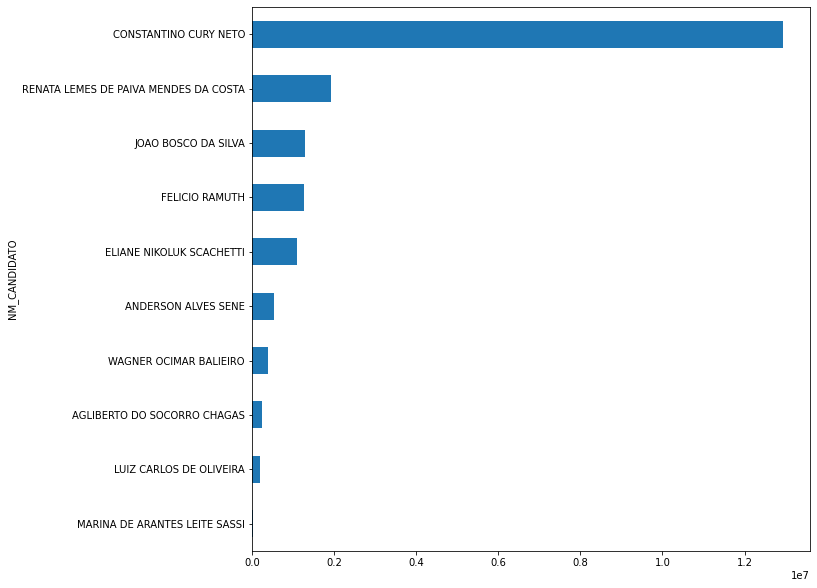

In [184]:
bens2020.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [ ]:
#O próximo grafico nos tras em ordem os candidato que declararm os maiores valores de bens em 2016:

<AxesSubplot:ylabel='NM_CANDIDATO'>

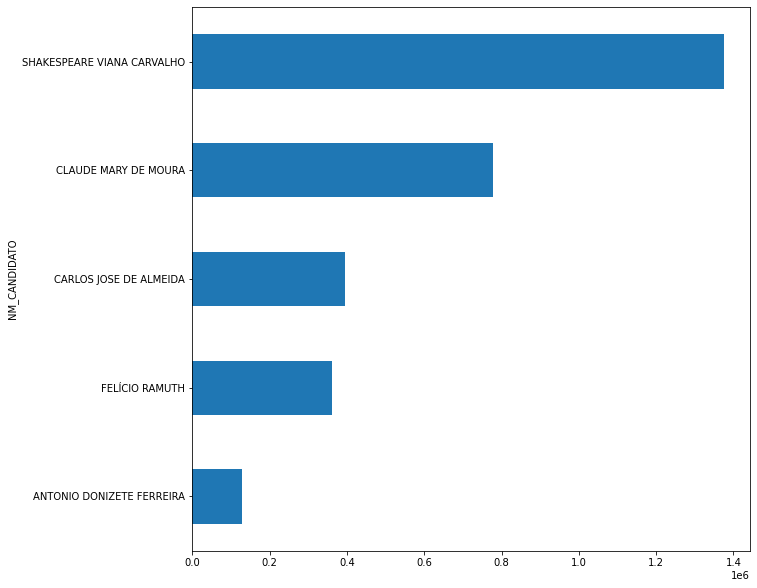

In [144]:
bens2016.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

In [ ]:
# Verificaremos a média de valores dos candidatos  2020:

In [185]:
bens2020.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().mean()

1993066.1119999997

In [106]:
# Verificaremos a média de valores dos candidatos  2016:

In [186]:
bens2016.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().mean()

607614.9439999999

In [187]:
bens2020 = bens2020.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().mean()

In [188]:
bens2016 = bens2016.query('NM_UE == "SÃO JOSÉ DOS CAMPOS"').groupby(['NM_UE','SQ_CANDIDATO','NM_CANDIDATO'])['VR_BEM_CANDIDATO'].sum().mean()

In [ ]:
#Por fim verificaremos quantos por cento aumentou o patrimonio declado entre os candidatos de 2016 e 2020:

In [194]:
100 -((bens2016 *100)/bens2020)

69.51355801287139

In [ ]:
#Um aumento de 69%

In [ ]:
# A conclusão é que em 2020 alem de mais candidatos  a cidade de SJC teve cadidatos com patrimonios economicos muito elevados.

In [ ]:
# O candidato Felicio Ramuth tinha um patrimonio de R$361000,00 e em 2020 passou para R$1266000,00.